# Assignment 3: Non-Linear Models and Validation Metrics (37 total marks)
### Due: October 24 at 11:59pm

### Name: 

### In this assignment, you will need to write code that uses non-linear models to perform classification and regression tasks. You will also be asked to describe the process by which you came up with the code. More details can be found below. Please cite any websites or AI tools that you used to help you with this assignment.

### Import Libraries

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1: Regression (14.5 marks)

For this section, we will be continuing with the concrete example from yellowbrick. You will need to compare these results to the results from the previous assignment. Please use the results from the solution if you were unable to complete Assignment 2

### Step 1: Data Input (0.5 marks)

The data used for this task can be downloaded using the yellowbrick library: 
https://www.scikit-yb.org/en/latest/api/datasets/concrete.html

Use the yellowbrick function `load_concrete()` to load the concrete dataset into the feature matrix `X` and target vector `y`.

In [63]:
# TO DO: Import concrete dataset from yellowbrick library
from yellowbrick.datasets import load_concrete
X, y = load_concrete()


### Step 2: Data Processing (0 marks)

Data processing was completed in the previous assignment. No need to repeat here.

### Step 3: Implement Machine Learning Model

1. Import the Decision Tree, Random Forest and Gradient Boosting Machines regression models from sklearn
2. Instantiate the three models with `max_depth = 5`. Are there any other parameters that you will need to set?
3. Implement each machine learning model with `X` and `y`

### Step 4: Validate Model

Calculate the average training and validation accuracy using mean squared error with cross-validation. To do this, you will need to set `scoring='neg_mean_squared_error'` in your `cross_validate` function and negate the results (multiply by -1)

### Step 5: Visualize Results (4 marks)

1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy, and index: DT, RF and GB
2. Add the accuracy results to the `results` DataFrame
3. Print `results`

In [64]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

model_DT = DecisionTreeRegressor(max_depth = 5, random_state = 0)
model_RF = RandomForestRegressor(max_depth = 5, random_state = 0)
model_GB = GradientBoostingRegressor(max_depth = 5, random_state = 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

scores_DT = cross_validate(model_DT, X_train, y_train, cv = 5,
                        scoring='neg_mean_squared_error',
                       return_train_score=True)

scores_RF = cross_validate(model_RF, X_train, y_train, cv = 5,
                        scoring='neg_mean_squared_error',
                       return_train_score=True)

scores_GB = cross_validate(model_GB, X_train, y_train, cv = 5,
                        scoring='neg_mean_squared_error',
                       return_train_score=True)


results = pd.DataFrame(columns=['Training accuracy', 'Validation accuracy'],
                       index=['DT', 'RF', 'GB'])


results.at['DT', 'Training accuracy'] = -scores_DT['train_score'].mean()
results.at['DT', 'Validation accuracy'] = -scores_DT['test_score'].mean()

results.at['RF', 'Training accuracy'] = -scores_RF['train_score'].mean()
results.at['RF', 'Validation accuracy'] = -scores_RF['test_score'].mean()

results.at['GB', 'Training accuracy'] = -scores_GB['train_score'].mean()
results.at['GB', 'Validation accuracy'] = -scores_GB['test_score'].mean()

print(results)


   Training accuracy Validation accuracy
DT         43.485082           83.469559
RF         28.979606           46.785785
GB          3.222085             25.8525


Repeat the step above to print the R2 score instead of the mean-squared error. For this case, you can use `scoring='r2'`

In [65]:
# TO DO: ADD YOUR CODE HERE
scores_DT = cross_validate(model_DT, X_train, y_train, cv = 5,
                        scoring='r2',
                       return_train_score=True)

scores_RF = cross_validate(model_RF, X_train, y_train, cv = 5,
                        scoring='r2',
                       return_train_score=True)

scores_GB = cross_validate(model_GB, X_train, y_train, cv = 5,
                        scoring='r2',
                       return_train_score=True)


results = pd.DataFrame(columns=['Training accuracy', 'Validation accuracy'],
                       index=['DT', 'RF', 'GB'])


results.at['DT', 'Training accuracy'] = scores_DT['train_score'].mean()
results.at['DT', 'Validation accuracy'] = scores_DT['test_score'].mean()

results.at['RF', 'Training accuracy'] = scores_RF['train_score'].mean()
results.at['RF', 'Validation accuracy'] = scores_RF['test_score'].mean()

results.at['GB', 'Training accuracy'] = scores_GB['train_score'].mean()
results.at['GB', 'Validation accuracy'] = scores_GB['test_score'].mean()

print(results)

   Training accuracy Validation accuracy
DT          0.849106            0.706702
RF          0.899452            0.837136
GB          0.988827            0.910476


### Questions (6 marks)
1. How do these results compare to the results using a linear model in the previous assignment? Use values.
1. Out of the models you tested, which model would you select for this dataset and why?
1. If you wanted to increase the accuracy of the tree-based models, what would you do? Provide two suggestions.

*ANSWER HERE*

1. Comparing to Linear Models:
   The results of all three models tested in this assignment outperform the linear model from the previous assignment.
   The validation R2 scores are all notably higher than the linear model, with the best being 0.91 for GB (indicating a better fit of the data). Furthermore, the validation MSE's are all lower, with the best being 25.9 also for GB (showing less error and better model performance). Just as a comparison, the linear model's validation MSE was 93.6 and its validation R2 value was 0.64, both worse then the Gradient Boosting model.
  
2. Model Selection:
   Based on the results, I would select the Gradient Boosting model (GB) as it appears to be the most suitable choice for this dataset. It has the highest validation r2 score (0.91) and the lowest validation MSE (25.9). It also has the best training accuracy scores. This would suggest that the Gradient Boosting model provides the best balance between fitting the data well and generalizing to unknown data. It is the best model of the three tested.
  
3. Increasing Accuracy of Tree-Based Models:
   One way to increase the accuracy of tree-based models is to perform hyperparameter tuning. This involves systematically searching for the best combination of hyperparameters (e.g., max depth, number of trees, learning rate) to optimize the model's performance.
   Another way to increase the accuracy is to create new features or modify existing ones that might capture important patterns in the data. This can enhance the model's ability to represent complex relationships. Basically put an emphasis on the features that are important in influencing the predictive model correctly.



### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE*

Most of the code was sourced from my own knowledge as well as the material that has been covered so far in the course (lab notebooks covering similar content). I completed the steps in the order that they are outlined. 
For this part of the assignment I did use generative AI for one specific challenge I encountered. The challenge I experienced is figuring out the correct piece of code to get the average of the array of MSE and r2 values I was getting due to the multiple folds. I prompted the AI by asking it to calculate the average MSE value from the results of a cross_validate operation. I did not need to change the AI output and it helped me to understand how to isolate the part of the cross_validate result I needed and then get its average by using the mean() function.

## Part 2: Classification (17.5 marks)

You have been asked to develop code that can help the user classify different wine samples. Following the machine learning workflow described in class, write the relevant code in each of the steps below:

### Step 1: Data Input (2 marks)

The data used for this task can be downloaded from UCI: https://archive.ics.uci.edu/dataset/109/wine

Use the pandas library to load the dataset. You must define the column headers if they are not included in the dataset 

You will need to split the dataset into feature matrix `X` and target vector `y`. Which column represents the target vector?

Print the size and type of `X` and `y`

In [66]:
# TO DO: Import wine dataset
data = pd.read_csv('wine/wine.data', names = ['class', 'Alcohol', 'Malicacid', 'Ash',
                                              'Alcalinity_of_ash', 'Magnesium', 'Total_phenols',
                                              'Flavanoids', 'Nonflavanoid_phenols', 'Proanthocyanins',
                                              'Color_intensity', 'Hue',
                                              '0D280_0D315_of_diluted_wines', 'Proline'])

X = data.drop(columns = 'class')
# The class columm is the target vector
y = data['class']

print("Size of X: " + str(X.shape))
print("Type of X: " + str(type(X)))
print("Size of y: " + str(y.shape))
print("Type of y: " + str(type(y)))



Size of X: (178, 13)
Type of X: <class 'pandas.core.frame.DataFrame'>
Size of y: (178,)
Type of y: <class 'pandas.core.series.Series'>


### Step 2: Data Processing (1.5 marks)

Print the first five rows of the dataset to inspect:

In [67]:
# TO DO: ADD YOUR CODE HERE
print(X.head())

   Alcohol  Malicacid   Ash  Alcalinity_of_ash  Magnesium  Total_phenols  \
0    14.23       1.71  2.43               15.6        127           2.80   
1    13.20       1.78  2.14               11.2        100           2.65   
2    13.16       2.36  2.67               18.6        101           2.80   
3    14.37       1.95  2.50               16.8        113           3.85   
4    13.24       2.59  2.87               21.0        118           2.80   

   Flavanoids  Nonflavanoid_phenols  Proanthocyanins  Color_intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   0D280_0D315_of_diluted_wines  Proline  
0                        

Check to see if there are any missing values in the dataset. If necessary, select an appropriate method to fill-in the missing values

In [68]:
# TO DO: ADD YOUR CODE HERE
if X.isna().sum().sum() == 0:
    print("There are no missing values in this dataset")
else:
    X = X.fillna(X.mean())


There are no missing values in this dataset


How many samples do we have of each type of wine?

In [69]:
# TO DO: ADD YOUR CODE HERE
for value, count in y.value_counts().items():
    print(f"Type of wine: {value}, # of samples: {count}")


Type of wine: 2, # of samples: 71
Type of wine: 1, # of samples: 59
Type of wine: 3, # of samples: 48


### Step 3: Implement Machine Learning Model

1. Import `SVC` and `DecisionTreeClassifier` from sklearn
2. Instantiate models as `SVC()` and `DecisionTreeClassifier(max_depth = 3)`
3. Implement the machine learning model with `X` and `y`

### Step 4: Validate Model 

Calculate the average training and validation accuracy using `cross_validate` for the two different models listed in Step 3. For this case, use `scoring='accuracy'`

### Step 5: Visualize Results (4 marks)

#### Step 5.1: Compare Models
1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy
2. Add the data size, training and validation accuracy for each dataset to the `results` DataFrame
3. Print `results`

In [70]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

model_DTC = DecisionTreeClassifier(max_depth = 3)
model_SVC = SVC()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

scores_DTC = cross_validate(model_DTC, X_train, y_train, cv = 5,
                        scoring='accuracy',
                       return_train_score=True)

scores_SVC = cross_validate(model_SVC, X_train, y_train, cv = 5,
                        scoring='accuracy',
                       return_train_score=True)

results = pd.DataFrame(columns=['Data Size', 'Training accuracy', 'Validation accuracy'],
                       index=['DTC', 'SVC'])

results.at['DTC', 'Data Size'] = X.shape
results.at['DTC', 'Training accuracy'] = scores_DTC['train_score'].mean()
results.at['DTC', 'Validation accuracy'] = scores_DTC['test_score'].mean()

results.at['SVC', 'Data Size'] = X.shape
results.at['SVC', 'Training accuracy'] = scores_SVC['train_score'].mean()
results.at['SVC', 'Validation accuracy'] = scores_SVC['test_score'].mean()


print(results)


     Data Size Training accuracy Validation accuracy
DTC  (178, 13)          0.991939            0.878667
SVC  (178, 13)          0.671313            0.644333


#### Step 5.2: Visualize Classification Errors
Which method gave the highest accuracy? Use this method to print the confusion matrix and classification report:

In [71]:
# TO DO: Implement best model
print("The decision tree classifier gave the highest accuracy\n")
model_DTC.fit(X_train, y_train)

The decision tree classifier gave the highest accuracy



DecisionTreeClassifier(max_depth=3)

Text(170.97222222222223, 0.5, 'true value')

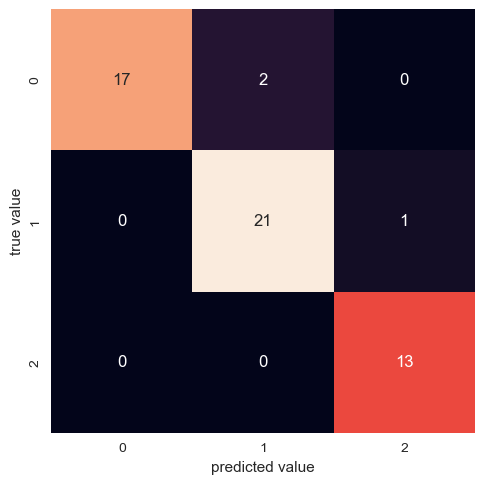

In [72]:
# TO DO: Print confusion matrix using a heatmap
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, model_DTC.predict(X_test))

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value')

In [73]:
# TO DO: Print classification report
from sklearn.metrics import classification_report

# Assuming you have your true labels and predicted labels
true_labels = y
predicted_labels = model_DTC.predict(X)

# Generate and print the classification report
report = classification_report(true_labels, predicted_labels)
print(report)

              precision    recall  f1-score   support

           1       1.00      0.95      0.97        59
           2       0.96      0.99      0.97        71
           3       0.98      1.00      0.99        48

    accuracy                           0.98       178
   macro avg       0.98      0.98      0.98       178
weighted avg       0.98      0.98      0.98       178



### Questions (6 marks)
1. How do the training and validation accuracy change depending on the method used? Explain with values.
2. What are two reasons why the support vector machines model did not work as well as the tree-based model?
3. How many samples were incorrectly classified in step 5.2? 
4. In this case, is maximizing precision or recall more important? Why?

*YOUR ANSWERS HERE*

1. The training and validation accuracy change significantly based on the method used. The Decision Tree Classifier (DTC) achieved higher training accuracy (99.2%) compared to the Support Vector Classifier (SVC) (67.2%). Furthermore, in terms of validation accuracy, DTC also outperforms SVC (87.0% for DTC vs. 64.4% for SVC). Therefore, for this dataset it is clear that DTC is the superior model.

2. One reason the SVC may not have performed well is the complexity of the data. As the SVC is kernelized it is better suited for non-linear data. Therefore, it is possible that the dataset is better suited to a linear model, and that is why the SVC underperformed.
Another reason could be the hyperparameter setting. The default hyperparameters of the SVC model might not be well suited for this dataset. In this case, parameter tuning was not performed, and it is reasonable to assume that with some tuning, a better model could have been achieved. 

3. I ran the confusion matrix on both models so it is easier to visualize the samples incorrectly classified, and I summed the incorrect ones manually. For the DTC model there were only 3 samples incorrectly classified. For the SVC however, there were 12 samples incorrectly classified, the most common being sample 3 being misclassified as sample 2 (7 times).

4. In this specific example, I am not sure a false positive (precision) or false negative (recall) would matter more than the other as in both cases, you are mislabeling a wine. You either assign it the wrong wine class through a false positive, or through a false negative, either way the wine has been mislabeled. Therefore, in this context I don't believe it matters which one is maximized, as the consequences of having a false positive or a false negative are equal.


### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?



*DESCRIBE YOUR PROCESS HERE*

Most of the code was sourced from my own knowledge as well as the material that has been covered so far in the course (lab notebooks covering similar content). I completed the steps in the order that they are outlined. 
I did use generative AI for one specific part in the second half. I used it to help me generate the classification report. I just prompted it by asking it how I would generate a classification report. I then took its output (which was just a generic version of the classification report function) and adapted it to my requirements, using my test and predicted target vector values. This was probably the only challenge for this part fo the assignment.

## Part 3: Observations/Interpretation (3 marks)

Describe any pattern you see in the results. Relate your findings to what we discussed during lectures. Include data to justify your findings.

*ADD YOUR FINDINGS HERE*

### Part One

Decision Tree (DT):

The training accuracy for the Decision Tree is quite high, at 0.849. However, the validation accuracy is lower, at 0.707. This drop in accuracy between training and validation sets suggests that the Decision Tree is likely overfitting the training data. It's capturing some noise and maybe not generalizing very well. This aligns with the lecture discussions about decision trees' tendency to overfit.

Random Forest (RF):

The training accuracy for the Random Forest is also quite high, at 0.899. Similar to the Decision Tree however, the validation accuracy is lower, at 0.837. Like the Decision Tree, the Random Forest might be exhibiting overfitting tendencies, but it is clearly better than the single Decision Tree maybe due to it utilizing multiple decision trees and averaging their results.

Gradient Boosting (GB):

The training accuracy for Gradient Boosting is substantially higher, at 0.989, compared to the previous models. The validation accuracy for Gradient Boosting is also significantly higher, at 0.910, and is better than the previous models. Gradient Boosting is showing significantly better generalization performance compared to Decision Trees and Random Forests. This aligns with the lecture discussions about ensemble methods, like Gradient Boosting, being effective at reducing overfitting and improving model accuracy.

### Part Two

The Decision Tree Classifier achieved a very high training and validation accuracy. This would suggest that DTC is robust to overfitting, as it generalizes well to the validation data.

The Support Vector Classifier has a lower training accuracy compared to the DTC, indicating that it doesn't fit the training data as closely. The validation accuracy is also lower, but the drop from training to validation accuracy is smaller compared to the DTC. This suggests that the SVC has achieved a better balance between training and validation performance but still not as good of a model overall.



## Part 4: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.


*ADD YOUR THOUGHTS HERE*

I enjoyed this assignment because by working through all the steps I gained a much better understanding of the models themselves, how they work, and their output. I also learned more about the methods that we have at our disposal (like cross_validate) and what they fundamentally mean. This assignment also helped reiterate how important it is to try different models and pick the model best suited to your data.
I liked that the reflection questions made me actually think about what I was doing and how the models worked, instead of just plugging in the methods.

## Part 5: Bonus Question (3 marks)

Repeat Part 2 and compare the support vector machines model used to `LinearSVC(max_iter=5000)`. Does using `LinearSVC` improve the results? Why or why not?

Is `LinearSVC` a good fit for this dataset? Why or why not?

In [74]:
# TO DO: ADD YOUR CODE HERE
from sklearn.svm import LinearSVC

model_LSVC = LinearSVC(max_iter=5000, dual = 'auto')

scores_LSVC = cross_validate(model_LSVC, X, y, cv = 5,
                        scoring='accuracy',
                       return_train_score=True)

results = pd.DataFrame(columns=['Training accuracy', 'Validation accuracy'],
                       index=['SVC', 'LSVC'])

results.at['SVC', 'Training accuracy'] = scores_SVC['train_score'].mean()
results.at['SVC', 'Validation accuracy'] = scores_SVC['test_score'].mean()

results.at['LSVC', 'Training accuracy'] = scores_LSVC['train_score'].mean()
results.at['LSVC', 'Validation accuracy'] = scores_LSVC['test_score'].mean()

print(results)


     Training accuracy Validation accuracy
SVC           0.671313            0.644333
LSVC          0.990161            0.955079


*ANSWER HERE*

LinearSVC is a linear support vector machine, and it's suited for problems that have linearly separable classes or datasets where a linear decision boundary is a good approximation. For this dataset, it is clear that using the LinearSVC model improves the results greatly as both the training and validation accuracy increase by about 30% as compared to the general SVC model. This means that the wine dataset likely has linearly separable classes and therefore, it is better to use the LinearSVC model as the decision boundary it draws is linear.

I believe the LinearSVC model is a good fit for the data because of the very high validation accuracy score.
Furthermore, there are some other advantages to using it if possible. It is a simpler model, and therefore it has a faster convergence as well as a reduced risk of overfitting.